In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
gis= pd.read_csv("C:/Users/PQ/Desktop/gis_data.csv")
df = pd.DataFrame(gis)

In [43]:
gis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              6899 non-null   object 
 1   postal code       6214 non-null   object 
 2   city_GIS_1        6899 non-null   float64
 3   city_GIS_2        6899 non-null   float64
 4   branch_GIS_1      6899 non-null   float64
 5   branch_GIS_2      6899 non-null   float64
 6   postalcode_GIS_1  6899 non-null   float64
 7   postalcode_GIS_2  6899 non-null   float64
dtypes: float64(6), object(2)
memory usage: 431.3+ KB


In [34]:
gis.describe()

,Unnamed: 0,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
count,6899.000000,6886.000000,6886.000000,4633.000000,4633.000000,5.197000e+03,5179.000000
mean,3449.000000,36.126343,50.054557,36.135882,50.119157,1.199879e+06,50.011474
std,1991.714086,0.197080,0.263723,0.178326,0.151452,4.945171e+07,0.265501
min,0.000000,35.579889,49.222306,35.707574,49.694056,1.800000e+01,49.190333
25%,1724.500000,36.044611,50.007111,36.069361,50.057667,3.604461e+01,49.923722
50%,3449.000000,36.223528,50.057667,36.223528,50.182528,3.623058e+01,50.007111
75%,5173.500000,36.252528,50.182917,36.223528,50.182528,3.628853e+01,50.058972
max,6898.000000,36.542111,50.890361,36.288528,51.347655,3.454178e+09,50.890361


In [35]:
miss_data = gis.isnull().sum()
miss_data

Unnamed: 0             0
city                   0
postal code          685
city_GIS_1            13
city_GIS_2            13
branch_GIS_1        2266
branch_GIS_2        2266
postalcode_GIS_1    1702
postalcode_GIS_2    1720
dtype: int64

In [36]:
numeric_features = gis.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Unnamed: 0', 'city_GIS_1', 'city_GIS_2', 'branch_GIS_1',
       'branch_GIS_2', 'postalcode_GIS_1', 'postalcode_GIS_2'],
      dtype='object')

In [37]:
gis.drop(['Unnamed: 0'], inplace=True, axis=1)

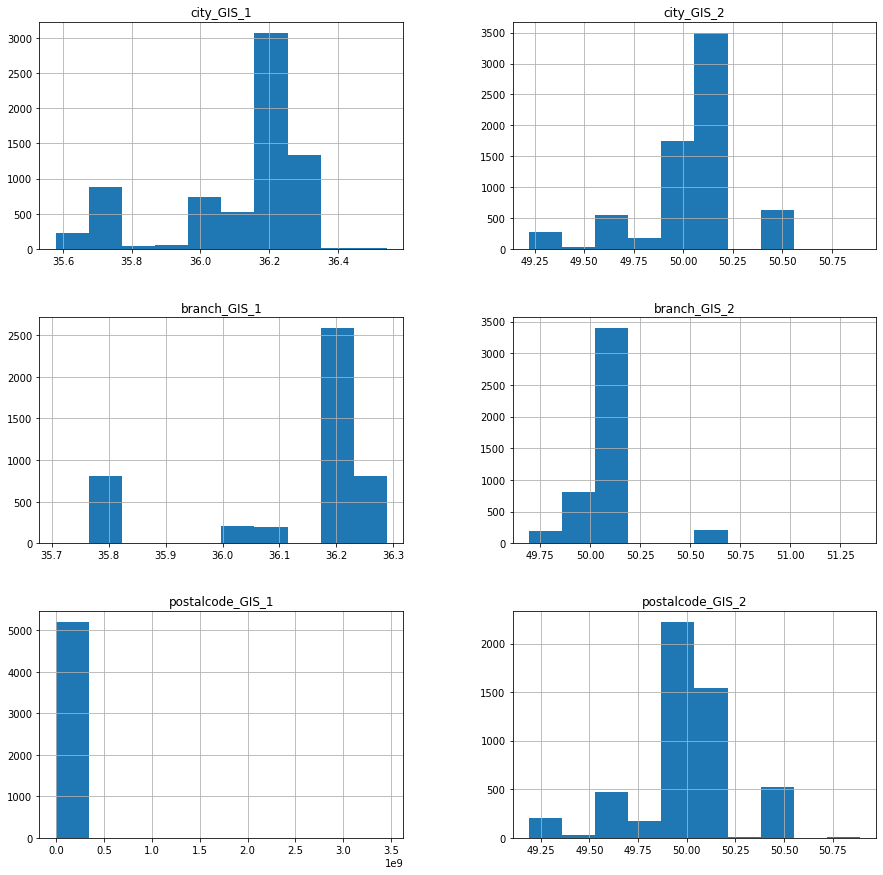

In [38]:
h = gis.hist(figsize = (15,15))

In [39]:
#correlation between features
gis.corr()

,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_GIS_1,1.000000,0.368242,0.945996,0.163948,-0.018290,0.286337
city_GIS_2,0.368242,1.000000,0.296707,0.654767,0.005323,0.933107
branch_GIS_1,0.945996,0.296707,1.000000,0.122743,-0.026566,0.170086
branch_GIS_2,0.163948,0.654767,0.122743,1.000000,-0.001922,0.650102
postalcode_GIS_1,-0.018290,0.005323,-0.026566,-0.001922,1.000000,-0.053635
postalcode_GIS_2,0.286337,0.933107,0.170086,0.650102,-0.053635,1.000000


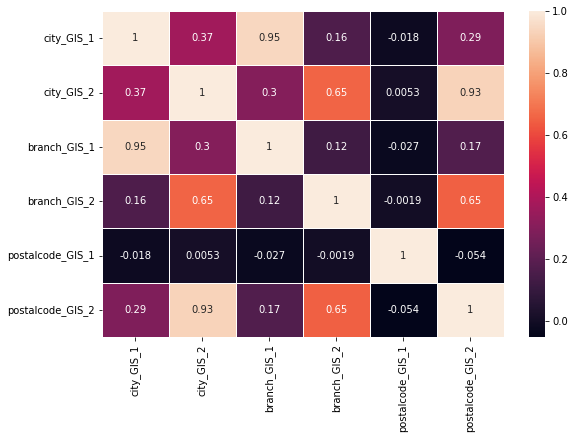

In [40]:
plt.subplots(figsize=(9, 6))
sns.heatmap(gis.corr(), annot=True, linewidths=.5)
plt.show()

In [50]:
gis['city'].value_counts

<bound method IndexOpsMixin.value_counts of 0       بوئین زهرا
1       بوئین زهرا
2       بوئین زهرا
3       بوئین زهرا
4       بوئین زهرا
           ...    
6894         قزوین
6895         قزوین
6896         قزوین
6897         قزوین
6898           شال
Name: city, Length: 6899, dtype: object>

In [41]:
gis['city_GIS_1'].fillna(gis['city_GIS_1'].mean(), inplace = True)
gis['city_GIS_2'].fillna(gis['city_GIS_2'].mean(), inplace = True)
gis['branch_GIS_1'].fillna(gis['branch_GIS_1'].mean(), inplace = True)
gis['branch_GIS_2'].fillna(gis['branch_GIS_2'].mean(), inplace = True)
gis['postalcode_GIS_1'].fillna(gis['postalcode_GIS_1'].mean(), inplace = True)
gis['postalcode_GIS_2'].fillna(gis['postalcode_GIS_2'].mean(), inplace = True)

c:\Users\PQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


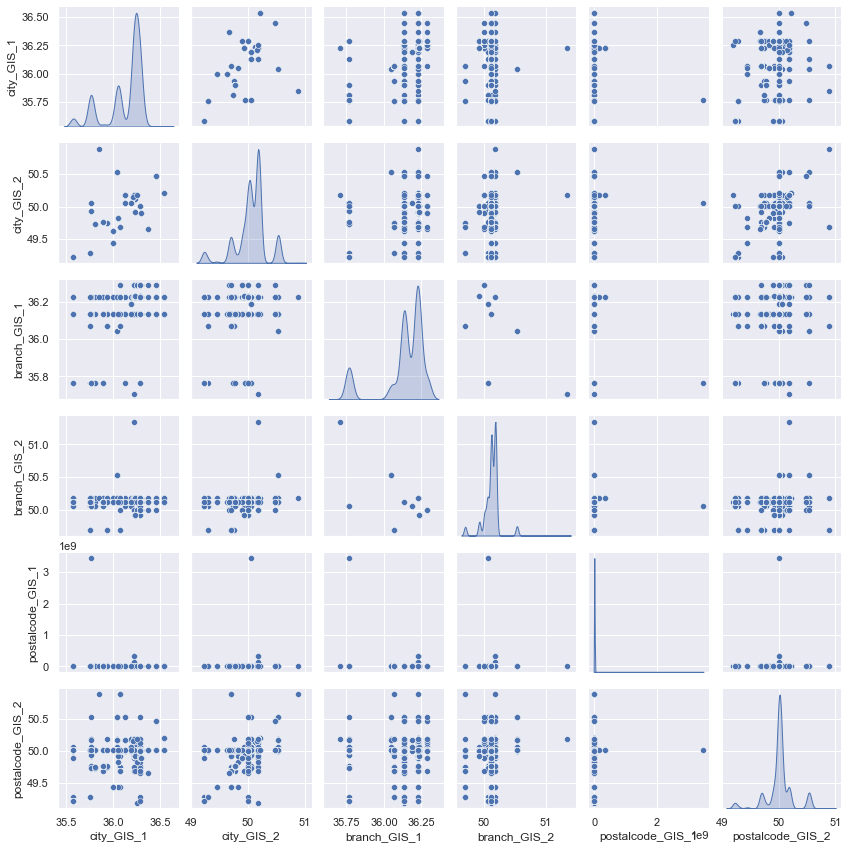

In [42]:
sns.set()
columns = ['city_GIS_1','city_GIS_2','branch_GIS_1','branch_GIS_2','postalcode_GIS_1','postalcode_GIS_2']
sns.pairplot(gis[columns],size = 2,kind ='scatter',diag_kind='kde')
plt.show()